#Name: Jennyfer Laura Estevão Thole

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/titanic

/content/drive/MyDrive/titanic


In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [ ]:
dictionary = pd.read_csv('Data Dictionary.csv')

This is the dictionary and it is here to help us understand some terms on the dataset and what each column represents

In [ ]:
print(dictionary.to_string())

   Data Dictionary                                       Unnamed: 1                                      Unnamed: 2  Unnamed: 3  Unnamed: 4
0              NaN                                              NaN                                             NaN         NaN         NaN
1         Variable                                       Definition                                             Key         NaN         NaN
2         survival                                         Survival                                 0 = No, 1 = Yes         NaN         NaN
3           pclass                                     Ticket class                       1 = 1st, 2 = 2nd, 3 = 3rd         NaN         NaN
4              sex                                              Sex                                             NaN         NaN         NaN
5              age                                     Age in years                                             NaN         NaN         NaN
6            sibsp  

#Data Exploration

In [ ]:
train_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
print('===Size of train dataset===')
print(train_data.shape)
print('===Size of test dataset===')
print(test_data.shape)

===Size of train dataset===
(891, 12)
===Size of test dataset===
(418, 11)


In [ ]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#Preprocessing missing data and duplicates

Firstly I will start by identifying if there are duplicates or not

In [ ]:
print('==Train dataset==')
print(train_data.duplicated().any())

print('==Test dataset==')
print(test_data.duplicated().any())

==Train dataset==
False
==Test dataset==
False


As we can there are no duplicates. Now I want to check if there are missing values or not

In [ ]:
print('==Train dataset==')
print(train_data.isnull().sum())
print('\n')
print('==Test dataset==')
print(test_data.isnull().sum())

==Train dataset==
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


==Test dataset==
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


There are some missing values. To deal with those empty values I will fill all the empty values of a column with it's mean or mode, depending on the feature type

Before doing data cleaning, I want to first see how is the completeness of my dataset

#Completeness

In [ ]:
nullValues = train_data.isnull().sum().sum()
print(nullValues)

866


In [ ]:
nonMissingValues = train_data.count().sum()
print(nonMissingValues)

9826


In [ ]:
totalValues = nullValues + nonMissingValues
completeness = nonMissingValues/totalValues
print('{0:.1f}%'.format(completeness*100))

91.9%


The dataset is almost complete. Now I can go to the Data Cleaning phase

#Data Cleaning

In [ ]:
# For training
mean_age = np.round(train_data['Age'].mean())
mode_embarked = train_data['Embarked'].mode()[0]
mode_cabin = train_data['Cabin'].mode()[0]

train_data['Age'].fillna(mean_age, inplace=True)
train_data['Embarked'].fillna(mode_embarked, inplace=True)
train_data['Cabin'].fillna(mode_cabin, inplace=True)


In [ ]:
#For testing
mean_age = np.round(test_data['Age'].mean())
mean_fare = np.round(test_data['Fare'].mean())
mode_cabin = train_data['Cabin'].mode()[0]

test_data['Age'].fillna(mean_age, inplace=True)
test_data['Fare'].fillna(mean_fare, inplace=True)
test_data['Cabin'].fillna(mode_cabin, inplace=True)

In [ ]:
print('==Training==')
print(train_data.isnull().sum())
print('\n')
print('==Testing==')
print(test_data.isnull().sum())

==Training==
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


==Testing==
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


#Correlation Analysis

This correlation table can give us some hints about which group was more likely to survive and which not

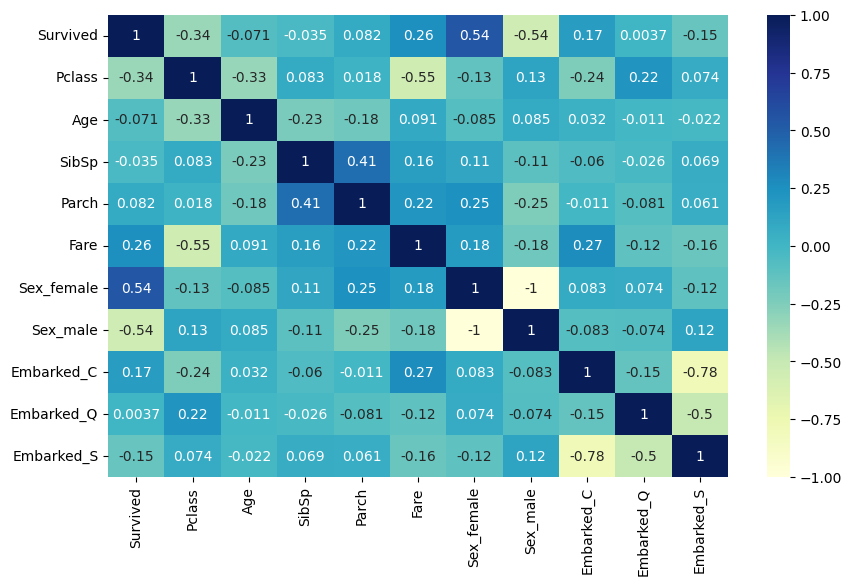

In [ ]:
dummy_values = pd.get_dummies(train_data, columns=['Sex','Embarked'])
correlation = dummy_values.drop(columns=['PassengerId']).corr(numeric_only=True)
plt.figure(figsize = (10,6))
sns.heatmap(data=correlation, cmap='YlGnBu', annot=True)
plt.show()

From the table above we can see that there is an inverse relationship between Age and Survived, meaning that children had more priority than adult and were more likely to survive.

We can see the same pattern with Sex_male and survived, meaning that men were less likely to survive than women because women had  more priority over men.

Now I want to compare the number of women and men that survived.

To do so I decided to use the bar plot because of it's simplicity.

#Plotting some graphics

I want to see how many people survived and how many died

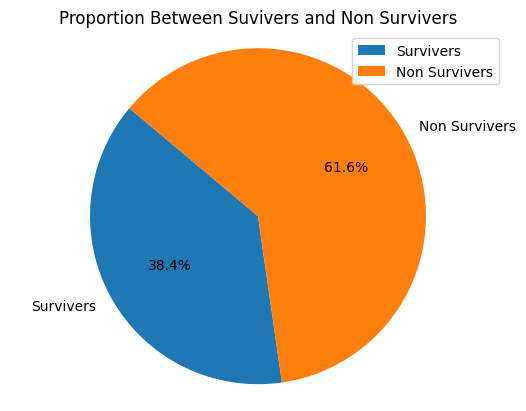

In [ ]:
survivers = train_data[train_data['Survived'] == 1]
count_survivers = len(survivers)
count_non_survivers = len(train_data) - count_survivers
plt_labels = ['Survivers', 'Non Survivers']
plt_size = [count_survivers, count_non_survivers]

plt.pie(plt_size, labels = plt_labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion Between Suvivers and Non Survivers')
plt.axis('equal')
plt.legend()
plt.show()

So, as we can see the majority of the passengers died during the shipwreck

<BarContainer object of 2 artists>

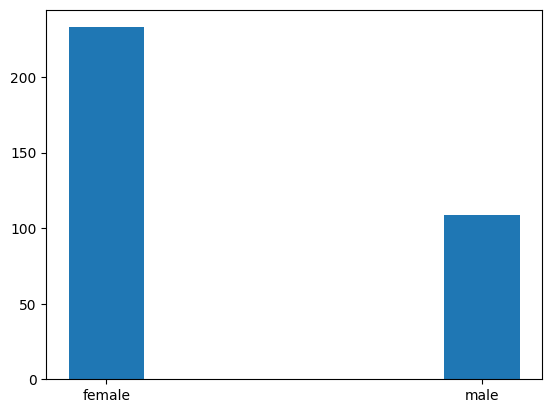

In [ ]:
survivers = train_data[train_data['Survived']==1] #I am selecting only the tuples with passengers that survived
gender_survivers = survivers['Sex'].value_counts() #It gives me the number of women that survived
plt.bar(gender_survivers.index, gender_survivers.values, 0.2) #Numbers of men that survived


This bar plot only confirms what the correlation table already told us about men and women

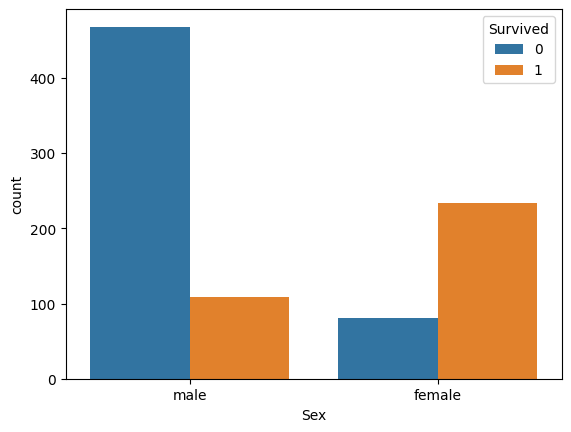

In [ ]:
sns.countplot(x='Sex', hue='Survived', data = train_data)
plt.show()

The graphic above is telling us the same thing that  the other bar plot had already said. The proportion of female that survived is higher than that of male and that is because women had more priority than men in the rescue

The graph below shows us the proportion of survivors among the three existing passenger classes

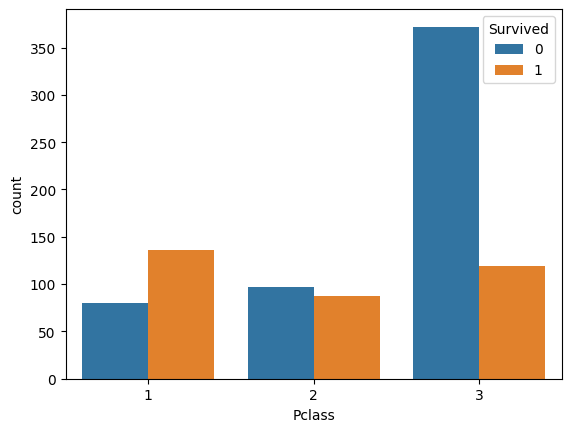

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.show()

This graph shows us that among each one of the three classes, the passengers from the 3rd class were the ones which survival rate was lower compared to the other 2 classes

In [ ]:
print(gender_survivers.values)

[233 109]


#Starting with the predictions

To construct my model I will use th Random Forest Classifier

In [ ]:
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked'] #Those are the features I want to base my predictions

X = pd.get_dummies(train_data[features])
y = train_data['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) #I will use 20% of the data for testing and the 80% for training

In [ ]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train,y_train)
predictions = model.predict(X_val)
predictions

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

Now I want to see how good or bad my model performed

In [ ]:
from sklearn.metrics import accuracy_score,precision_score, recall_score
accuracy = accuracy_score(y_val, predictions)
precision = precision_score(y_val, predictions)
recall = recall_score(y_val, predictions)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.8044692737430168
Precision: 0.8
Recall: 0.7027027027027027


I don't know yet if those numbers are good or bad, but I hope that those numbers mean that we are on a good way.

#Trying to improve my model

Random Forest allows me  to identfy the most important features for the classification.

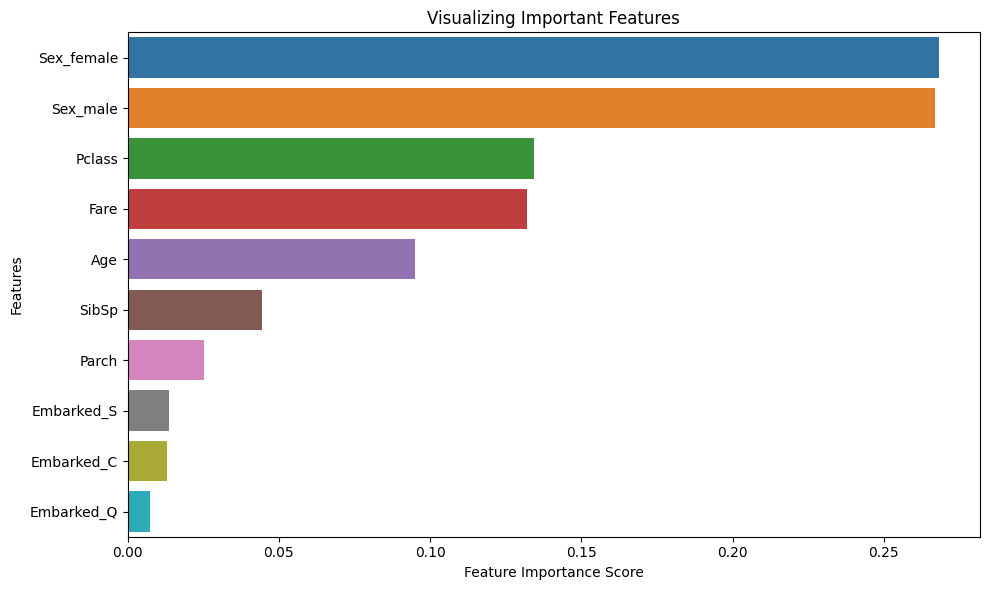

In [ ]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize = (10,6))
sns.barplot(x=feature_importance, y=feature_importance.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

To improve our model I could try to remove the less important features and see if my performance improves

In [ ]:
features = ['Pclass', 'Age', 'Fare', 'Sex'] #Those are the features I want to base my predictions now

X = pd.get_dummies(train_data[features])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)
model.fit(X_train,y_train)
predictions = model.predict(X_val)



In [ ]:
accuracy = accuracy_score(y_val, predictions)
precision = precision_score(y_val, predictions)
recall = recall_score(y_val, predictions)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.8100558659217877
Precision: 0.8225806451612904
Recall: 0.6891891891891891


I can see here that removing those less important features my model improved a little bit. So, the variables I am using this time will be actually the variables I will use to predict on test.csv

In [ ]:
X_test = pd.get_dummies(test_data.drop(columns = ['PassengerId','Name','Ticket','Cabin', 'Embarked', 'Parch', 'SibSp'],axis=1))
test_predictions = model.predict(X_test)

In [ ]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived':test_predictions })
output.to_csv('submission.csv', index=False)

#Some Bibliographic References

* Notebooks provided by the teacher
* https://www.kaggle.com/code/alexisbcook/titanic-tutorial
* https://www.kaggle.com/code/akash1vishwakarma/titanic-survival-prediction